<a href="https://colab.research.google.com/github/EdRey05/Resources_for_Mulligan_Lab/blob/main/Tools%20for%20students/Eduardo%20Reyes/02-METABRIC_KM_Plot_Second_Batch_%5BColab%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Notebook to generate Kaplan-Meier survival probability plots based on gene expression***

**Original data from:** *METABRIC*

**Publication DOI:** *10.1038/ncomms11479*

**Data downloaded from:** *https://www.cbioportal.org/study/summary?id=brca_metabric*

**Notebook made by:** *Eduardo Reyes-Alvarez (Ph.D. candidate)*

**Affiliation:** *Dr. Lois Mulligan's lab, Queen's University.*

**Contact:** *eduardo_reyes09@hotmail.com*

**Date of latest version:** December 20, 2020.

## 0-Introduction

**Explanation of what this notebook does**

This notebook generates Kaplan-Meier survival estimate curves from data obtained from a breast cancer study (METABRIC) corresponding to this publication: https://pubmed.ncbi.nlm.nih.gov/27161491/

From that data file, we used the mRNA Seq expression levels and clinical information of patients. We focused this study on ER+ patients within the dataset and looked for expression of RET and other genes that we obtained as potential candidates for novel interactions with RET, through a synthetic lethality study.

This notebook corresponds to a second batch of genes screened to evaluate any possible relationship between the expression levels and overall survival of patients. (names of genes can be seen in the variable **input2**). In order to run this notebook, you need to mount a drive (google account), which should contain the input files required and the resulting graphs are saved into the drive folder specified.

***Note:*** This notebook contains some dataset-unique steps, so it is not possible to use it for other studies without some modifications.

**Instructions**

-Create a Google account and log in

-In this notebook, click File -> Save a copy in Drive

-Go to Google Drive

-You should have a "Colab Notebook" folder, open it

-You should see this notebook there

-Upload there the input files with clinical and RNA Seq data (organize in subfolders if you want)

-Synchronize your Google Drive account (run the following code box, click the link that will appear, copy the code by clicking in the symbol on the right side of it, paste it in the blank that will appear and click enter)

-Proceed with the next code box

In [ ]:
#This is needed when working in Google Colab to synchronize google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Double click this box, edit the following 5 things and read the following lines

#01-Clinical data file directory (in your Drive)
clinical_dataset_directory = "/content/drive/MyDrive/Colab Notebooks/Mulligan Lab - PhD/KM_plots/METABRIC_2012_2016/input_files/1-clinical.txt"

#02-RNA Seq data file directory (in your Drive)
RNA_dataset_directory = "/content/drive/MyDrive/Colab Notebooks/Mulligan Lab - PhD/KM_plots/METABRIC_2012_2016/input_files/1-mRNA.txt"

#03-File name for excel output and directory for graphs (in your Drive)
output_directory = "/content/drive/MyDrive/Colab Notebooks/Mulligan Lab - PhD/KM_plots/METABRIC_2012_2016/output_files/SECOND_BATCH"
output_file_name = "My_File_01.xlsx"

#04-Write the gene of reference
input1 = "RET"

#05-Write the genes of interest, follow the example:
input2 = ["LRCH1", "PIK3CD", "AKT1", "CORO6", "USPL1", "RAC1", "PLEKHO2", "FJX1", "ROR2", "ATM", "FGFR1", "ZNF672", "ETNK2", "SEMA4B", "RGS17", "ADAM19", "LPXN", "PRKCZ", "RUVBL1", "PSMB7", "LCMT2", "ZFYVE27", "ATMIN", "HAUS6", "MMACHC", "CDK18", "BMPR2", "ZNF74", "C1orf122", "NTHL1", "FER", "PIK3C2A", "PITPNM1", "ZNF680", "FZD3", "FAM184A", "PTPRM", "ANKRD46", "ITFG2", "EEPD1"]

#Note: The clinical and RNA Seq files can be txt/tsv/csv/xls/xlsx or other (check pandas read_csv documentation)
separator = '\t'   #If values are separated by other than a tab, change the t for comma or other symbol 

#No action needed here. Some files have # to indicate metadata or comments, we read the files excluding these lines 
import pandas as pd
clinical_dataset = pd.read_csv(clinical_dataset_directory, sep=separator, comment="#") 
RNA_dataset = pd.read_csv(RNA_dataset_directory, sep=separator, comment="#")

#No action needed here, read next comments, click to run this box and check the output
#It is recommended to search if the genes of interest are in the dataset before starting to prevent errors
#If you have genes that were not found, try alternative names and run the box again
#If you still have genes not found, delete them and run the box again, since they are not in the dataset
#Once the -Not found genes- output is empty you can proceed 
found_genes=[]; not_found_genes=[]
for gene in input2:
  if gene in RNA_dataset.values:
    found_genes.append(gene)
  else:
    not_found_genes.append(gene)
print("Found genes:", found_genes, "\nNot found genes:", not_found_genes)

Found genes: ['LRCH1', 'PIK3CD', 'AKT1', 'CORO6', 'USPL1', 'RAC1', 'PLEKHO2', 'FJX1', 'ROR2', 'ATM', 'FGFR1', 'ZNF672', 'ETNK2', 'SEMA4B', 'RGS17', 'ADAM19', 'LPXN', 'PRKCZ', 'RUVBL1', 'PSMB7', 'LCMT2', 'ZFYVE27', 'ATMIN', 'HAUS6', 'MMACHC', 'CDK18', 'BMPR2', 'ZNF74', 'C1orf122', 'NTHL1', 'FER', 'PIK3C2A', 'PITPNM1', 'ZNF680', 'FZD3', 'FAM184A', 'PTPRM', 'ANKRD46', 'ITFG2', 'EEPD1'] 
Not found genes: []


Now you can go to the menu Runtime -> Restart and run all, you will see a moving symbol when the subsections are run and after a few minutes everything will be finished and the results can be seen in the provided output directory in your Google Drive. 

If you want, you can open the subsections once finished to see the steps that were made and some additional graphs to preview the distribution of data. 

**Note:** The cutoff used for all genes was 0, the data used was Z-scores compared to median of all samples. At the end of section 2 you can see the distribution of Z-scores for each gene and in section 3, step 08 you can change the cutoff for all genes. If you want to change it to any other value, re-run that step (2 code boxes) and see the graphs of the frequency of patients with 0 and 1 (hopefully a somewhat similar number for best results), then re-run the whole notebook (change output folder if you want to compare KM plots with both cutoffs).

## 1-Importing_datasets 

**Step 01- Import neccesary packages**

In [ ]:
#Google Colab does not include these by default
!pip install XlsxWriter
!pip install lifelines

     |████████████████████████████████| 149 kB 5.0 MB/s 
     |████████████████████████████████| 348 kB 5.1 MB/s 
     |████████████████████████████████| 55 kB 4.9 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=624c73362146cd2e81c18f3f36517e8f7ec12121185f2c57dea3f812f89bc34a
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [ ]:
#These packages are needed to run this code
import pandas as pd                      #Work with dataframes
import numpy as np                       #Do mathematical operations in arrays
import matplotlib.pyplot as plt          #Generate graphs
import math                              #Make some calculations
import xlsxwriter                        #Save dataframes to excel
from lifelines import KaplanMeierFitter  #Generate Kaplan-Meier plots

**Step 02- Check the data was imported correctly**

In [ ]:
print("\t The clinical dataset shape is", clinical_dataset.shape, "and it should look like this: ")
clinical_dataset.head()

	 The clinical dataset shape is (2509, 22) and it should look like this: 


,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,SEX,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
0,MB-0000,10.0,6.044,NaN,NO,1.0,Positve,NEUTRAL,YES,Post,Female,4ER+,75.65,140.500000,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY
1,MB-0002,0.0,4.020,High,NO,1.0,Positve,NEUTRAL,YES,Pre,Female,4ER+,43.19,84.633333,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
2,MB-0005,1.0,4.030,High,YES,1.0,Positve,NEUTRAL,YES,Pre,Female,3,48.87,163.700000,1:DECEASED,LumB,NaN,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY
3,MB-0006,3.0,4.050,Moderate,YES,1.0,Positve,NEUTRAL,YES,Pre,Female,9,47.68,164.933333,0:LIVING,LumB,NaN,Living,Right,YES,Mixed,MASTECTOMY
4,MB-0008,8.0,6.080,High,YES,1.0,Positve,NEUTRAL,YES,Post,Female,9,76.97,41.366667,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Mixed,MASTECTOMY


In [ ]:
print("\t The RNA Seq dataset shape is", RNA_dataset.shape, "and it should look like this: ")
RNA_dataset.head()

	 The RNA Seq dataset shape is (24368, 1906) and it should look like this: 


,Hugo_Symbol,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,MB-0316,MB-0189,MB-0891,MB-0658,MB-0899,MB-0605,MB-0258,MB-0506,MB-0420,MB-0223,MB-0445,MB-0199,MB-0517,MB-0155,MB-0428,MB-0117,MB-0906,MB-0249,MB-0660,MB-0497,MB-0434,MB-0143,MB-0513,MB-0541,MB-0653,MB-0455,MB-0540,MB-0384,MB-0637,MB-0157,...,MB-0554,MB-0418,MB-0193,MB-0652,MB-0638,MB-0188,MB-0617,MB-7225,MB-7141,MB-7234,MB-7089,MB-7030,MB-7004,MB-7119,MB-7263,MB-7012,MB-0174,MB-7182,MB-7039,MB-3797,MB-7112,MB-0308,MB-7230,MB-5452,MB-6195,MB-6317,MB-5464,MB-5552,MB-5547,MB-6189,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
0,RERE,473.0,-0.7082,1.2179,0.0168,-0.4248,0.4916,0.5156,-1.2105,-0.9309,-0.2677,-0.2058,0.0574,-1.5193,-0.7772,-0.9181,0.2394,-0.9748,-1.1523,0.8707,-0.1873,0.1653,0.5299,0.7585,-2.3216,0.5164,0.8593,-1.0783,-0.0215,0.4860,-2.2433,-1.1704,0.2427,-0.0826,-1.0450,-1.3771,0.9574,0.0076,-1.9017,-0.9087,...,-1.1220,-1.2957,-0.6210,-1.3053,-0.0283,0.7426,-0.9640,0.4828,0.1762,1.0486,-1.3705,-0.4778,0.7837,-0.2893,-0.4794,-1.7475,-0.4334,-0.8337,-0.2481,0.4766,0.6000,1.4961,0.3467,0.9492,-0.2670,-0.7050,1.5957,0.0952,1.3845,0.9690,-0.5452,-0.4450,1.8429,1.1092,1.1871,-1.8702,1.1299,0.0481,-0.3357,-1.2562
1,RNF165,494470.0,-0.4419,0.4140,-0.6843,-1.1139,-0.6875,-0.2522,-0.4124,-0.0023,-0.8910,0.1057,-0.4155,0.4638,0.8374,-0.4661,-0.1932,-1.2889,-0.7169,-0.2564,-1.1598,0.2598,-0.5296,-0.2771,-1.1163,1.1032,-0.8309,0.3295,0.1367,-0.7570,0.1022,-0.0042,0.6676,-1.1626,-0.9034,-0.1874,0.5936,-1.2339,-1.3324,-0.7319,...,-0.4246,-1.0261,-1.2040,-1.3848,1.2016,-1.1161,-1.4790,1.7849,-0.7883,-0.1628,0.1850,0.7969,-0.6616,0.4195,0.5240,-0.1559,1.7879,0.7552,-0.2263,-0.9400,0.9368,0.9853,-0.0908,1.6589,-0.0539,-0.9814,-0.0221,-0.7197,0.2184,1.8342,0.9537,-1.1564,0.9563,0.0470,-0.2570,3.2290,1.3609,0.6291,0.2281,0.6051
2,CD049690,NaN,0.2236,0.2255,0.5691,0.3545,0.7865,-0.3715,1.9356,-0.1612,1.0461,-0.0902,-1.2729,-0.1908,0.3930,-1.3171,0.9258,1.2782,-0.7292,0.4645,0.8456,-0.1746,-0.8542,0.0865,-1.2032,-0.5965,-1.0484,-0.7149,0.9748,0.7648,0.5376,-1.4845,-0.9804,-0.4768,-0.1592,0.4353,1.1146,-0.4561,0.6237,0.8148,...,0.6477,-1.8258,-0.4694,-0.2443,2.1688,-0.7787,-0.2225,4.1293,0.0953,0.0537,1.9720,0.9534,-0.0271,-0.1908,-1.8347,1.3536,0.2196,-2.4571,-0.0160,-0.1629,-0.7191,0.8204,1.0265,1.0715,-0.0548,-0.5283,-0.1916,-0.0552,-0.7100,0.6415,-0.5783,-0.4329,0.5928,-1.0796,0.1163,-0.0018,0.8035,-0.6178,1.0327,0.8558
3,BC033982,NaN,-2.1485,0.4763,-0.2446,0.2618,-0.2695,-0.8391,-0.6770,0.9853,0.4264,0.7944,-0.9091,-1.1531,0.2370,-0.9090,-1.4928,0.0661,-1.0102,-0.0942,-0.9869,1.0588,-0.0327,-0.4509,-0.8427,-1.1743,-0.2455,1.7189,-1.0293,0.7530,2.4480,1.5684,1.2780,-0.5669,-0.2207,-0.8455,1.7815,1.0084,-0.1312,0.7477,...,-1.2020,0.3349,-1.3935,0.1443,0.0614,-0.0887,0.8928,-1.7124,-0.9357,1.4183,0.6556,0.6824,-0.8608,0.4699,-0.9680,-0.6512,-0.6870,-0.4018,0.5797,-1.3845,0.3055,1.0826,-0.7996,-0.8162,-1.0063,-0.2351,0.2894,1.6583,-0.1239,1.0301,0.1445,-3.1854,-2.2533,1.1311,0.4819,-2.5749,-1.6314,-0.8435,-1.0429,-0.1023
4,PHF7,51533.0,-0.3220,-1.0921,0.2830,-0.2864,0.0772,-0.4976,-0.6453,-0.0506,-0.1191,-1.3048,-0.2684,-0.8994,-0.1699,0.2948,0.6792,-1.3175,-1.8584,-0.1986,-0.1728,-0.3930,-0.0825,-0.1474,-0.1259,-0.9390,-0.5774,-1.0183,-0.6164,1.0060,-0.0790,0.1654,3.0748,0.7799,-1.2902,-0.7540,-1.1193,-1.1546,0.1446,-0.3004,...,1.2046,0.6518,0.3972,0.1298,0.1213,-0.4941,0.6247,-1.4855,-1.0298,-1.3945,3.1340,-0.6509,1.2956,-1.5130,0.2674,-1.4586,-0.7194,0.0541,-1.0309,1.1298,-0.2124,0.7143,-0.0709,-0.2194,-0.2341,0.6075,1.6191,-0.4744,-0.1693,-0.8000,-0.9190,-0.0539,0.7454,0.1631,0.8931,-0.9482,-0.0397,0.5491,-0.0115,4.1846


## 2-Data_filtering 

**Step 03- Rearrange the RNA dataframe.**

**Most RNA Seq data is reported having the samples (patients in this case) in columns and genes in rows, but we want to have the same format as the clinical dataframe (patients as rows, to simplify the processing). We also note that, neither the genes, nor the patients are ordered by name/number in the original file, so we correct for that in our dataframe too.**

In [ ]:
RNA_dataset = RNA_dataset.sort_values("Hugo_Symbol")               #Sort rows (genes) 
RNA_dataset = RNA_dataset.reset_index(drop=True)                   #Reset index, not making other column with new indices
RNA_dataset = RNA_dataset.sort_index(axis=1)                       #Sort columns (patients) 
RNA_dataset = RNA_dataset.drop(columns="Entrez_Gene_Id")           #Delete that column
RNA_dataset = RNA_dataset.set_index("Hugo_Symbol").T               #Transpose
RNA_dataset = RNA_dataset.rename_axis("PATIENT_ID").reset_index()  #Patient ID went to be x-axis names

print("\t Now the RNA Seq dataframe shape is", RNA_dataset.shape, "and it looks like this: ")
RNA_dataset.head()
#Ignore Hugo_Symbol, it does not contain that info, just the number of elements in the dataframe

	 Now the RNA Seq dataframe shape is (1904, 24369) and it looks like this: 


Hugo_Symbol,PATIENT_ID,A1BG,A1CF,A2M,A3GALT2,A4GALT,A4GNT,AA001128,AA013027,AA017152,AA017302,AA021278,AA025808,AA045369,AA057856,AA06,AA076070,AA081463,AA083069,AA084299,AA102425,AA121704,AA126469,AA131921,AA151413,AA169852,AA177072,AA180005,AA188598,AA188909,AA190191,AA190488,AA195612,AA213559,AA215505,AA229858,AA234556,AA252821,AA262636,AA281452,...,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN5D,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,abParts,hCG_1642047,hCG_1646325,hCG_1818547,hCG_1993022,hCG_1997999,hCG_2023280,hCG_2032453,hDV103S1,hNp95,hPMS8,hVPS11,mih1/Tx,pKBF-2,psiTPTE22,tMDC,tMDC II,truncated AKR
0,MB-0000,-0.6074,0.5092,0.8489,-2.0901,0.5119,1.2566,-0.6142,-0.3373,-0.9979,-0.0065,-1.6293,-0.4806,-0.1695,-0.7212,-0.1486,0.5820,0.7918,0.4188,-0.2863,0.2438,0.2797,-0.0930,-0.6695,0.4780,0.0249,-0.6764,0.5221,0.5071,-0.0513,0.1429,2.1953,-0.3992,0.5704,-0.4853,-1.6918,-0.4171,1.0326,-0.7326,-0.5085,...,0.3803,-0.5831,-1.2608,-0.1224,-1.4306,-0.2073,-1.5256,0.1486,-0.8244,-0.4721,-0.2196,-1.0481,-1.4985,-2.7192,-0.3817,-1.0840,0.1048,-1.4054,0.0949,0.4140,-0.4179,-0.6553,0.8925,-0.4746,0.3563,0.8110,0.5560,-0.8664,1.8341,1.1930,-0.6644,-2.1755,0.6696,-1.1264,-0.4005,0.7766,-0.4513,-0.4525,0.8682,-1.5789
1,MB-0002,-0.2469,-0.6031,-0.8258,0.9701,0.4970,-0.7856,0.8728,-1.5799,0.6533,1.9104,-0.2565,1.0074,-1.8605,0.3571,-0.3505,0.6372,0.3297,-0.1404,-0.8000,-0.3602,-0.3665,-0.7190,-2.0211,0.4061,-0.3987,2.1150,-1.0105,-0.2043,-0.8759,-0.2429,-1.2995,-0.8487,-1.4326,-0.9680,-0.5426,1.0458,0.4397,1.0084,0.5056,...,-0.1855,-0.9291,-0.0844,-0.8641,1.1063,-2.2958,-0.3673,-0.4892,-1.1043,1.0000,-0.2627,-1.2930,-0.3029,-0.7265,0.3913,2.7797,0.6446,-0.0838,-0.4929,-0.1298,-0.3695,-0.2535,-0.5745,-0.5775,0.1411,1.6141,1.3248,-0.9703,-0.7393,1.2182,-0.9280,-0.6968,-1.8526,-1.7330,0.6179,1.5150,-1.2010,0.4439,0.2384,-0.8152
2,MB-0005,0.6546,0.4422,0.9348,1.7684,-0.3699,-1.3290,-0.5119,-0.0041,-0.4030,-0.5815,1.1407,-0.5112,-0.6572,0.4992,-1.2230,0.3502,-1.2818,0.0400,0.1601,1.4184,-0.1631,-0.0990,-0.1807,0.2637,0.8168,-2.2387,-0.4663,0.5997,0.9003,-2.3360,1.1719,-0.7276,-1.8391,0.0686,-0.3266,-0.9994,0.3804,-1.0007,-0.4810,...,0.4760,-0.4322,-1.8171,1.8205,-0.5993,1.3780,0.0817,-1.4818,-0.5014,-0.0605,0.3268,2.2172,2.8654,0.3004,0.4536,1.4770,-2.6086,-1.9022,0.4511,-0.0430,-3.3703,0.2373,-0.4557,-1.1384,0.8308,-0.8403,-1.0087,-0.2072,-0.2923,1.3678,-0.6918,0.1922,1.1901,0.4692,-0.5186,3.5781,1.5827,0.4301,0.4582,-0.5447
3,MB-0006,-2.3896,-0.4547,2.2572,-1.1328,-0.4155,2.7322,0.7113,-0.1766,-2.2133,-1.1629,0.9828,1.3389,0.4543,-0.0315,-0.0643,-1.6414,0.3282,-1.4744,-1.5818,0.2231,0.0712,-0.6997,1.8115,0.7347,1.0674,-1.5855,0.0668,0.1590,0.9418,-1.1012,-0.0463,0.0907,-0.2668,-0.4555,-0.6282,-0.2519,-0.8283,-2.1198,-1.2995,...,-0.5833,-1.1303,-0.0039,-0.5840,-2.4903,-0.8217,-1.6393,-2.0830,0.3191,0.5699,0.5783,0.1668,2.0891,-0.6548,0.0969,0.3208,-1.6190,-0.0679,0.1121,-0.7560,-0.9397,1.5453,0.3596,-0.8623,-0.2576,-1.2942,0.2237,0.3096,-2.4648,-1.0712,-0.6818,-0.7559,-0.0989,1.1721,0.9832,3.4341,-0.5925,0.8723,0.7092,-0.7848
4,MB-0008,-0.0698,-1.1003,0.8368,-1.3692,-0.7929,-0.9109,-0.3293,-0.3458,0.0146,-0.2312,0.9159,-0.3789,-1.0668,1.0389,-0.3485,-0.7694,-0.1813,-0.0278,-1.9186,1.5193,0.1897,-0.8079,-1.3796,-0.5478,-1.6962,-2.1123,1.0932,0.5836,-0.1144,0.5631,2.1519,0.6276,-0.1601,-0.2404,-0.5967,1.4378,-0.4916,-1.5363,0.3674,...,-0.5933,-0.5545,-0.9938,-1.6923,0.1607,-0.5881,-0.2729,-1.7404,1.5228,-1.3144,-1.0281,0.0516,0.6798,1.0570,0.4769,0.2718,2.9638,-0.0825,-1.3335,-1.0204,0.3474,-0.4846,0.9969,1.0547,-0.5369,-1.6481,-0.4106,0.2532,-0.3981,-0.1100,-1.0235,-0.1042,-0.9629,0.2299,3.2432,-0.7779,0.3172,-1.3349,0.6811,0.5632


**Step 04-Select cohort/subset**

**Since RET may play a role mainly in ER+ cancers, we can use the ER IHC column to filter out our dataset (or use a separate file) and remove all the clinical and mRNA data from ER- or with no information about it.**

In [ ]:
#Note: There is a typo in the original dataset, it says "Positve" instead of "Positive"
clinical_subset1 = clinical_dataset.query('ER_IHC=="Positve"')

print("Clinical dataset filtered for ER+ patients = subset1")
print("\t Original:", clinical_dataset.shape, "\n \t Subset:", clinical_subset1.shape, "\n \t Removed:", clinical_dataset.shape[0]-clinical_subset1.shape[0])
clinical_subset1.head()

Clinical dataset filtered for ER+ patients = subset1
	 Original: (2509, 22) 
 	 Subset: (1817, 22) 
 	 Removed: 692


,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,SEX,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
0,MB-0000,10.0,6.044,NaN,NO,1.0,Positve,NEUTRAL,YES,Post,Female,4ER+,75.65,140.500000,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY
1,MB-0002,0.0,4.020,High,NO,1.0,Positve,NEUTRAL,YES,Pre,Female,4ER+,43.19,84.633333,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
2,MB-0005,1.0,4.030,High,YES,1.0,Positve,NEUTRAL,YES,Pre,Female,3,48.87,163.700000,1:DECEASED,LumB,NaN,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY
3,MB-0006,3.0,4.050,Moderate,YES,1.0,Positve,NEUTRAL,YES,Pre,Female,9,47.68,164.933333,0:LIVING,LumB,NaN,Living,Right,YES,Mixed,MASTECTOMY
4,MB-0008,8.0,6.080,High,YES,1.0,Positve,NEUTRAL,YES,Post,Female,9,76.97,41.366667,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Mixed,MASTECTOMY


**Step 05-Select clinical variables to study**

**We have  several variables (columns) in the clinical dataset, we can make easier the dataframe handling and improve visualization if we just pick the variables we want to look at, and make a subset dataframe containing that information.**
**For example, we need the patient IDs plus OS in months at least, and for the KM plot we also need to see how many patients died, so OS Status could be useful, however, Vital Status is better since it indicates the patients who did not die from the disease and thus we should exclude those from our analysis.**

In [ ]:
clinical_variables = ["PATIENT_ID", "OS_MONTHS", "VITAL_STATUS"]           #Add/remove column names here
clinical_subset2 = clinical_subset1[clinical_variables]

print("\t Subset2 = ER+ patients + variables of interest", clinical_subset2.shape)
clinical_subset2.head()

	 Subset2 = ER+ patients + variables of interest (1817, 3)


,PATIENT_ID,OS_MONTHS,VITAL_STATUS
0,MB-0000,140.500000,Living
1,MB-0002,84.633333,Living
2,MB-0005,163.700000,Died of Disease
3,MB-0006,164.933333,Living
4,MB-0008,41.366667,Died of Disease


**Step 06- Select genes for RNA Seq filtering**

**At this point we have the clinical information we want to analyze (unprocessed yet). Next, we need to filter the RNA Seq dataset to combine the information of the genes of interest with this dataframe and proceed to process/prepare the data. For this, we enter the genes of interest and filter out all the others (this study has 24,368 in total).**

In [ ]:
#We bring back the genes given at the beginning 
gene_ref = input1
genes = sorted(input2)
RNA_subset1 = RNA_dataset[["PATIENT_ID"] + [gene_ref] + genes]

print("\t Dataset with genes of interest, shape:", RNA_subset1.shape)
RNA_subset1.head()                          
#Remember that Hugo_Symbol is nothing other than the index for the rows

	 Dataset with genes of interest, shape: (1904, 42)


Hugo_Symbol,PATIENT_ID,RET,ADAM19,AKT1,ANKRD46,ATM,ATMIN,BMPR2,C1orf122,CDK18,CORO6,EEPD1,ETNK2,FAM184A,FER,FGFR1,FJX1,FZD3,HAUS6,ITFG2,LCMT2,LPXN,LRCH1,MMACHC,NTHL1,PIK3C2A,PIK3CD,PITPNM1,PLEKHO2,PRKCZ,PSMB7,PTPRM,RAC1,RGS17,ROR2,RUVBL1,SEMA4B,USPL1,ZFYVE27,ZNF672,ZNF680,ZNF74
0,MB-0000,-1.1924,-2.4177,-1.1445,0.5938,1.1487,-0.6775,0.9780,-0.4359,-0.1808,-0.2313,1.6029,-1.3003,1.3553,2.4076,1.8000,-0.1908,0.0425,-0.4386,0.5084,-0.0697,-1.5737,0.1068,0.0149,-0.6443,-0.0063,0.0543,-1.1508,0.4409,-1.9678,-0.5897,1.6681,0.3767,-0.0794,-1.4797,-1.1235,-0.9879,-0.0770,0.2864,-1.6492,-0.5563,-1.7857
1,MB-0002,-0.7346,-0.0130,0.0560,-0.5616,-0.2563,2.3755,0.1995,1.5456,-1.6688,1.8434,-0.8847,1.6097,-0.5544,-0.0088,0.3690,1.0067,0.7974,0.4811,0.0314,-1.6090,0.0078,-0.2187,0.7185,-1.1934,2.0666,-0.9490,-0.9940,-2.8529,1.1845,-0.1978,0.2879,1.3150,0.5660,0.8672,0.8414,-0.3899,-0.1582,-0.1955,-0.7825,1.4073,0.7713
2,MB-0005,-0.5291,0.3009,0.9376,0.2522,-0.0700,3.9277,1.7153,0.3495,-1.4170,0.2991,-0.8600,-0.7148,-0.8296,0.0220,-0.4762,-1.1841,0.2522,-0.2021,-0.3342,0.5998,0.6323,-0.5548,-2.1954,-0.9656,0.7143,-1.3170,0.0345,-0.9011,-1.8664,-0.4425,-0.2785,3.0542,0.5686,-0.4580,0.0578,-0.0909,-0.2240,-1.8831,-1.7481,2.7934,-1.3336
3,MB-0006,0.9177,-1.4341,1.2346,2.2006,-0.8860,5.2458,2.2228,0.2012,-1.5197,-0.8644,-1.0686,0.2590,-0.9986,0.3311,-0.8517,-1.8474,-0.0628,2.7337,-0.4488,0.3482,-0.0808,-1.5649,-1.8022,-0.6601,-0.8492,-1.2794,0.0608,-0.0365,0.2309,-0.1728,-0.6127,2.2067,0.7042,-0.2522,0.5291,-2.5254,0.8805,-0.8696,-2.7871,1.5456,-1.7254
4,MB-0008,-0.9115,-2.1719,-0.9599,3.3820,0.3986,-0.2281,-0.7517,0.1520,0.2097,-0.8985,-0.4391,-0.0037,-2.0017,-1.6572,0.9645,0.2408,-0.2685,0.8776,0.4503,0.5848,0.1139,0.4421,-0.9401,0.8432,1.8571,-0.6887,-1.3591,-1.0532,-0.1602,-0.0882,-0.9143,0.4002,-0.3352,-0.8343,0.9070,-1.8694,-0.9771,-0.5824,0.9907,-0.2823,0.6938


**Step 07- Filter ER+ clinical and RNA Seq data**

**For this, we obtained the intersection of the clinical and RNA dataframes through the merge function.**

In [ ]:
#There are other ways and parameters (how=)
clinical_RNA_dataset = clinical_subset2.merge(RNA_subset1, how="inner")

print("\t Clinical + RNA Seq dataset for ER+ patients and selected genes", clinical_RNA_dataset.shape)
clinical_RNA_dataset.head()

	 Clinical + RNA Seq dataset for ER+ patients and selected genes (1445, 44)


,PATIENT_ID,OS_MONTHS,VITAL_STATUS,RET,ADAM19,AKT1,ANKRD46,ATM,ATMIN,BMPR2,C1orf122,CDK18,CORO6,EEPD1,ETNK2,FAM184A,FER,FGFR1,FJX1,FZD3,HAUS6,ITFG2,LCMT2,LPXN,LRCH1,MMACHC,NTHL1,PIK3C2A,PIK3CD,PITPNM1,PLEKHO2,PRKCZ,PSMB7,PTPRM,RAC1,RGS17,ROR2,RUVBL1,SEMA4B,USPL1,ZFYVE27,ZNF672,ZNF680,ZNF74
0,MB-0000,140.500000,Living,-1.1924,-2.4177,-1.1445,0.5938,1.1487,-0.6775,0.9780,-0.4359,-0.1808,-0.2313,1.6029,-1.3003,1.3553,2.4076,1.8000,-0.1908,0.0425,-0.4386,0.5084,-0.0697,-1.5737,0.1068,0.0149,-0.6443,-0.0063,0.0543,-1.1508,0.4409,-1.9678,-0.5897,1.6681,0.3767,-0.0794,-1.4797,-1.1235,-0.9879,-0.0770,0.2864,-1.6492,-0.5563,-1.7857
1,MB-0002,84.633333,Living,-0.7346,-0.0130,0.0560,-0.5616,-0.2563,2.3755,0.1995,1.5456,-1.6688,1.8434,-0.8847,1.6097,-0.5544,-0.0088,0.3690,1.0067,0.7974,0.4811,0.0314,-1.6090,0.0078,-0.2187,0.7185,-1.1934,2.0666,-0.9490,-0.9940,-2.8529,1.1845,-0.1978,0.2879,1.3150,0.5660,0.8672,0.8414,-0.3899,-0.1582,-0.1955,-0.7825,1.4073,0.7713
2,MB-0005,163.700000,Died of Disease,-0.5291,0.3009,0.9376,0.2522,-0.0700,3.9277,1.7153,0.3495,-1.4170,0.2991,-0.8600,-0.7148,-0.8296,0.0220,-0.4762,-1.1841,0.2522,-0.2021,-0.3342,0.5998,0.6323,-0.5548,-2.1954,-0.9656,0.7143,-1.3170,0.0345,-0.9011,-1.8664,-0.4425,-0.2785,3.0542,0.5686,-0.4580,0.0578,-0.0909,-0.2240,-1.8831,-1.7481,2.7934,-1.3336
3,MB-0006,164.933333,Living,0.9177,-1.4341,1.2346,2.2006,-0.8860,5.2458,2.2228,0.2012,-1.5197,-0.8644,-1.0686,0.2590,-0.9986,0.3311,-0.8517,-1.8474,-0.0628,2.7337,-0.4488,0.3482,-0.0808,-1.5649,-1.8022,-0.6601,-0.8492,-1.2794,0.0608,-0.0365,0.2309,-0.1728,-0.6127,2.2067,0.7042,-0.2522,0.5291,-2.5254,0.8805,-0.8696,-2.7871,1.5456,-1.7254
4,MB-0008,41.366667,Died of Disease,-0.9115,-2.1719,-0.9599,3.3820,0.3986,-0.2281,-0.7517,0.1520,0.2097,-0.8985,-0.4391,-0.0037,-2.0017,-1.6572,0.9645,0.2408,-0.2685,0.8776,0.4503,0.5848,0.1139,0.4421,-0.9401,0.8432,1.8571,-0.6887,-1.3591,-1.0532,-0.1602,-0.0882,-0.9143,0.4002,-0.3352,-0.8343,0.9070,-1.8694,-0.9771,-0.5824,0.9907,-0.2823,0.6938


**Step 07.1- Inspect dataframes**

**Now we have all the information we neeed together, note that the clinical + RNA dataset has less patients (rows) than the individual datasets. This is because not all ER+ patients were sequenced, thus we keep the intersection between dataframes. **Before starting processing the data to prepare it for KM curve plotting, we can have a quick look at its distribution:**

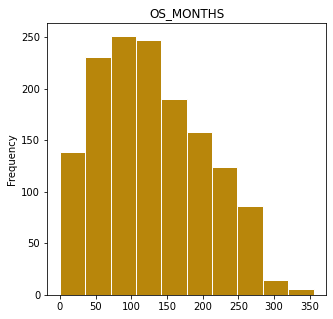

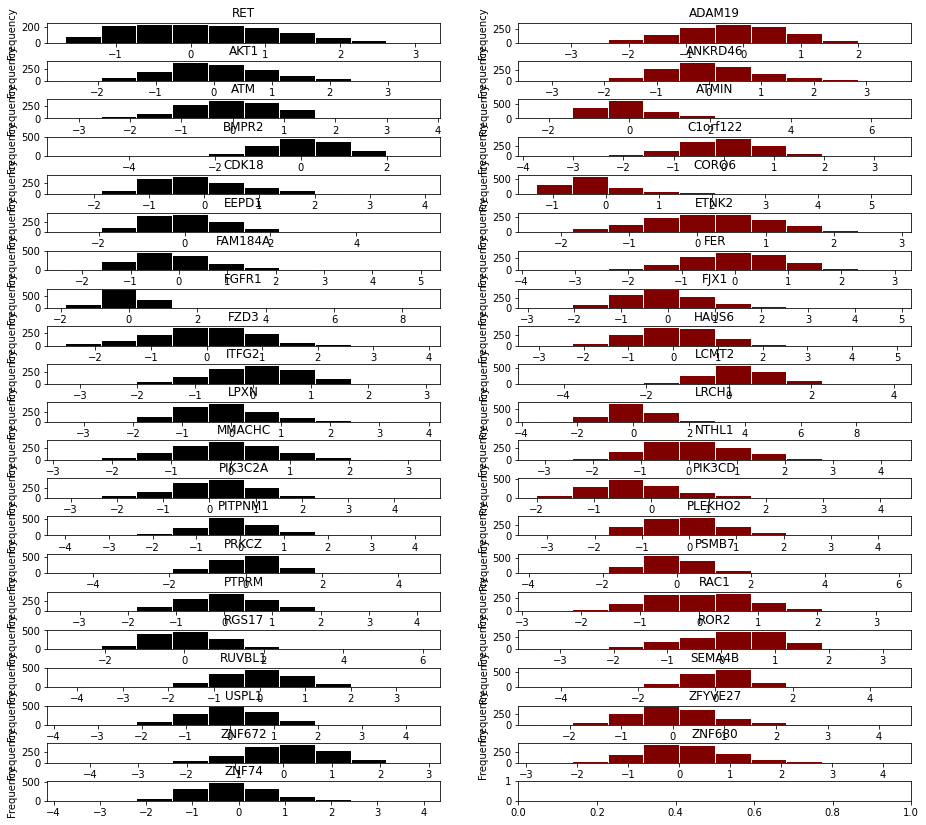

In [ ]:
plt.figure(figsize=(5,5))
clinical_RNA_dataset["OS_MONTHS"].plot.hist(title="OS_MONTHS", color="darkgoldenrod", ec="white")
plt.show()

if len(input2)<3:                      #This is just to avoid the error when trying to make a figure of 1 row
    rows=2
else:
    rows = math.ceil((len(input2)+1)/2)
        
fig, axs = plt.subplots(nrows=rows, ncols=2, figsize = (16,15)) #Adjust nrows to fit more genes
for i, gene in enumerate([gene_ref]+genes):
    if i%2==0 :
        x=int(i/2)
        clinical_RNA_dataset[gene].plot.hist(ax=axs[x, 0], color="black", title=gene, ec="white")
    else:
        x=int(i/2)
        clinical_RNA_dataset[gene].plot.hist(ax=axs[x, 1], color="maroon", title=gene, ec="white")
plt.subplots_adjust(top=0.92, bottom=0.2, left=0.2, right=0.95, hspace=0.95, wspace=0.2)
plt.show()

**From the first graph we can see how many patients have reported overall survival (in months) in the ranges shown. From the other graphs we can see how many patients have mRNA expression within those ranges for each gene, this can be used to stablish cutoffs or thresholds.**

## 3-Data_preparation

**Step 08- Set RNA Seq cutoffs and normalize data**

**Check the distribution and number of datapoints for each condition and decide a cutoff for the genes of interest. Bear in mind that if the cutoff is set too high/low, one condition may have a very small amount of samples labeled with 0 or 1 than others. It is recommended to edit and run the next 2 boxes of code, inspect the graph and decide if the number of samples in each group (low-0, high-1) is adequate for the analysis.**

In [ ]:
clinical_RNA_prep1 = clinical_RNA_dataset.copy()
gene_cutoff = 0        #Edit this value to set a custom cutoff (for all genes)

for gene in ([gene_ref]+genes):
    clinical_RNA_prep1.loc[clinical_RNA_prep1[gene]<=gene_cutoff, gene] = 0
    clinical_RNA_prep1.loc[clinical_RNA_prep1[gene]>gene_cutoff, gene] = 1
    clinical_RNA_prep1[gene] = clinical_RNA_prep1[gene].astype(int)    #Transform to integers

print("\t Updated dataframe with low=0 and high=1 gene expression", clinical_RNA_prep1.shape)
clinical_RNA_prep1.head()

	 Updated dataframe with low=0 and high=1 gene expression (1445, 44)


,PATIENT_ID,OS_MONTHS,VITAL_STATUS,RET,ADAM19,AKT1,ANKRD46,ATM,ATMIN,BMPR2,C1orf122,CDK18,CORO6,EEPD1,ETNK2,FAM184A,FER,FGFR1,FJX1,FZD3,HAUS6,ITFG2,LCMT2,LPXN,LRCH1,MMACHC,NTHL1,PIK3C2A,PIK3CD,PITPNM1,PLEKHO2,PRKCZ,PSMB7,PTPRM,RAC1,RGS17,ROR2,RUVBL1,SEMA4B,USPL1,ZFYVE27,ZNF672,ZNF680,ZNF74
0,MB-0000,140.500000,Living,0,0,0,1,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0
1,MB-0002,84.633333,Living,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,1,1
2,MB-0005,163.700000,Died of Disease,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0
3,MB-0006,164.933333,Living,1,0,1,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0
4,MB-0008,41.366667,Died of Disease,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1


**Basically, we will have 4 groups based on expression of RET and one more gene of interest at the time, which hopefully will have a similar number of samples (patients) to analyze (see height of bars below):**

**1) Low RET/Low GeneX = (-/-)**

**2) Low RET/High GeneX = (-/+)**

**3) High RET/Low GeneX = (+/-)**

**4) High RET/High GeneX = (+/+)**

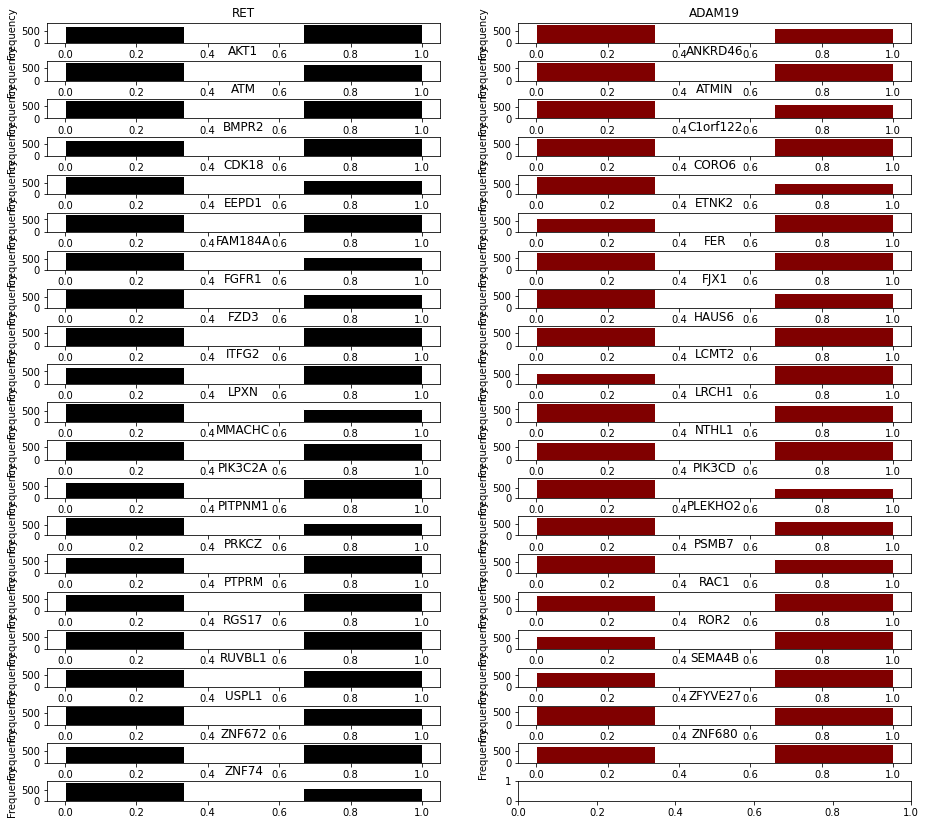

In [ ]:
fig, axs = plt.subplots(nrows=rows, ncols=2, figsize = (16,15)) #Adjust nrows to fit more genes
for i, gene in enumerate([gene_ref]+genes):
    if i%2==0 :
        x=int(i/2)
        clinical_RNA_prep1[gene].plot.hist(ax=axs[x, 0], color="black", bins=3, title=gene, ec="white")
    else:
        x=int(i/2)
        clinical_RNA_prep1[gene].plot.hist(ax=axs[x, 1], color="maroon", bins=3, title=gene, ec="white")
plt.subplots_adjust(top=0.92, bottom=0.2, left=0.2, right=0.95, hspace=0.95, wspace=0.2)
plt.show()

**Step 09-Make Vital status numerical**

**Previously, we inspected the first 5 rows of the dataframe (.head method), however, it is a good practise to check the metadata or inspect the different values a column could have. If we have a quick look at the bottom 5 rows of the dataframe (.tail method), we notice that some patients have  "Died of Other Reasons"  (not due to breast cancer). Since these may cause noise with the OS data, we will filter them out.**

**Note: Seek someone with more expertise in KM curves to determine if these patients could be kept and their OS times used as "Living" or some other strategy. For simplicity and since we have a big dataset, we recommend here to just filter them out.**

In [ ]:
print("\t This are the last 5 columns -bottom- of the dataframe: ")
clinical_RNA_prep1.tail()

	 This are the last 5 columns -bottom- of the dataframe: 


,PATIENT_ID,OS_MONTHS,VITAL_STATUS,RET,ADAM19,AKT1,ANKRD46,ATM,ATMIN,BMPR2,C1orf122,CDK18,CORO6,EEPD1,ETNK2,FAM184A,FER,FGFR1,FJX1,FZD3,HAUS6,ITFG2,LCMT2,LPXN,LRCH1,MMACHC,NTHL1,PIK3C2A,PIK3CD,PITPNM1,PLEKHO2,PRKCZ,PSMB7,PTPRM,RAC1,RGS17,ROR2,RUVBL1,SEMA4B,USPL1,ZFYVE27,ZNF672,ZNF680,ZNF74
1440,MB-7295,196.866667,Living,1,1,0,0,0,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1
1441,MB-7296,44.733333,Died of Disease,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0
1442,MB-7297,175.966667,Died of Disease,0,0,0,1,0,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
1443,MB-7298,86.233333,Died of Other Causes,1,0,1,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0
1444,MB-7299,201.900000,Died of Other Causes,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0


In [ ]:
#This box shows how we filtered out the patients who died from unrelated reasons
#The next line will keep the text shown, include any other text that may need to be kept
clinical_RNA_prep2 = clinical_RNA_prep1[clinical_RNA_prep1["VITAL_STATUS"].isin(["Living", "Died of Disease"])]
clinical_RNA_prep2 = clinical_RNA_prep2.reset_index(drop=True) #Reset index to prevent confusion

print("\t Keeping just the Living and Died of Disease: ", clinical_RNA_prep2.shape)
print("\t Removed: ", clinical_RNA_prep1.shape[0]-clinical_RNA_prep2.shape[0])
clinical_RNA_prep2.tail()

	 Keeping just the Living and Died of Disease:  (1034, 44)
	 Removed:  411


,PATIENT_ID,OS_MONTHS,VITAL_STATUS,RET,ADAM19,AKT1,ANKRD46,ATM,ATMIN,BMPR2,C1orf122,CDK18,CORO6,EEPD1,ETNK2,FAM184A,FER,FGFR1,FJX1,FZD3,HAUS6,ITFG2,LCMT2,LPXN,LRCH1,MMACHC,NTHL1,PIK3C2A,PIK3CD,PITPNM1,PLEKHO2,PRKCZ,PSMB7,PTPRM,RAC1,RGS17,ROR2,RUVBL1,SEMA4B,USPL1,ZFYVE27,ZNF672,ZNF680,ZNF74
1029,MB-7293,199.233333,Living,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0
1030,MB-7294,82.733333,Died of Disease,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
1031,MB-7295,196.866667,Living,1,1,0,0,0,1,1,1,0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1
1032,MB-7296,44.733333,Died of Disease,1,1,0,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0
1033,MB-7297,175.966667,Died of Disease,0,0,0,1,0,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0


**Now, we need to modify the Living and Died of Disease values to make it a numerical classification for KM analysis. We will assign 0 to "Living patients" and 1 to "Died of Disease" patients.**

In [ ]:
clinical_RNA_prep3 = clinical_RNA_prep2.copy()

clinical_RNA_prep3["VITAL_STATUS"] = clinical_RNA_prep3["VITAL_STATUS"].apply(lambda x: x.replace("Living", "0"))
clinical_RNA_prep3["VITAL_STATUS"] = clinical_RNA_prep3["VITAL_STATUS"].apply(lambda x: x.replace("Died of Disease", "1"))
clinical_RNA_prep3["VITAL_STATUS"] = pd.to_numeric(clinical_RNA_prep3["VITAL_STATUS"])

print("\t This is our dataframe fully processed and ready for KM plotting:", clinical_RNA_prep3.shape)
clinical_RNA_prep3.head()

	 This is our dataframe fully processed and ready for KM plotting: (1034, 44)


,PATIENT_ID,OS_MONTHS,VITAL_STATUS,RET,ADAM19,AKT1,ANKRD46,ATM,ATMIN,BMPR2,C1orf122,CDK18,CORO6,EEPD1,ETNK2,FAM184A,FER,FGFR1,FJX1,FZD3,HAUS6,ITFG2,LCMT2,LPXN,LRCH1,MMACHC,NTHL1,PIK3C2A,PIK3CD,PITPNM1,PLEKHO2,PRKCZ,PSMB7,PTPRM,RAC1,RGS17,ROR2,RUVBL1,SEMA4B,USPL1,ZFYVE27,ZNF672,ZNF680,ZNF74
0,MB-0000,140.500000,0,0,0,0,1,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0
1,MB-0002,84.633333,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,1,1
2,MB-0005,163.700000,1,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0
3,MB-0006,164.933333,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0
4,MB-0008,41.366667,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1


## 4-KM_plot

**Step 10- Preparing for KM Fitter**

**For this type of plot there are packages we can use to generate them without having to calculate everything on our own and making our graph from scratch. We imported the one for KM plots (within lifelines) and we will create an object for it to feed with our dataset. First, we bring our clinical+RNA fully-processed dataset.**

In [ ]:
dataKM = clinical_RNA_prep3.copy()     #For safety we generate a new variable for the next steps
survival_50 = pd.DataFrame(columns=["Gene", "LL_50%", "LH_50%", "HL_50%", "HH_50%"])  #We will collect the time for 50% survival

**Step 11- Feed the KMF object**

**Our goal is to find the number of days a patient survived before they died. Our event of interest will be “death” which is stored in the “VITAL_STATUS” column. The first argument our KM fitter takes is the timeline for our experiment, stored in the "OS_MONTHS" column.**

In [ ]:
def Make_KMplot(gene):
  
    KMF_LL = KaplanMeierFitter() 
    KMF_LH = KaplanMeierFitter()
    KMF_HL = KaplanMeierFitter()
    KMF_HH = KaplanMeierFitter()

    LL = dataKM[(dataKM[gene_ref]==0) & (dataKM[gene]==0)]
    LH = dataKM[(dataKM[gene_ref]==0) & (dataKM[gene]==1)]
    HL = dataKM[(dataKM[gene_ref]==1) & (dataKM[gene]==0)]
    HH = dataKM[(dataKM[gene_ref]==1) & (dataKM[gene]==1)]
    
    stop = 0.95 #Edit this if you want to plot more/less than 95% of datapoints
    LL_x_stop = int(len(LL.index)*stop)
    LH_x_stop = int(len(LH.index)*stop)
    HL_x_stop = int(len(HL.index)*stop)
    HH_x_stop = int(len(HH.index)*stop)

    print("LL:", LL.shape, "LH:", LH.shape, "HL:", HL.shape, "HH:", HH.shape,)
   
    KMF_LL.fit(durations =  LL["OS_MONTHS"], event_observed = LL["VITAL_STATUS"], label="Low-Low")
    KMF_LH.fit(durations =  LH["OS_MONTHS"], event_observed = LH["VITAL_STATUS"], label="Low-High")
    KMF_HL.fit(durations =  HL["OS_MONTHS"], event_observed = HL["VITAL_STATUS"], label="High-Low")
    KMF_HH.fit(durations =  HH["OS_MONTHS"], event_observed = HH["VITAL_STATUS"], label="High-High")
    
    fig = plt.figure(figsize=(12,9))
    KMF_LL.plot(ci_show=False, iloc=slice(0, LL_x_stop))
    KMF_LH.plot(ci_show=False, iloc=slice(0, LH_x_stop))
    KMF_HL.plot(ci_show=False, iloc=slice(0, HL_x_stop))
    KMF_HH.plot(ci_show=False, iloc=slice(0, HH_x_stop))
    
    plt.title("Kaplan-Meier Estimate For " + gene_ref + " and " + gene + " expression")
    plt.xlabel("Number of months")
    plt.ylabel("Probability of survival")
    plt.savefig(output_directory + "/" + gene_ref + "-" + gene, dpi=600)
    plt.close() 

    survival_50.loc[i] = [gene] + [KMF_LL.median_survival_time_] + [KMF_LH.median_survival_time_] + [KMF_HL.median_survival_time_] + [KMF_HH.median_survival_time_]
    

**Step 12- Run KFM plotting function**

In [ ]:
for i,gene in enumerate(genes):
    Make_KMplot(gene)

LL: (245, 44) LH: (252, 44) HL: (308, 44) HH: (229, 44)
LL: (301, 44) LH: (196, 44) HL: (255, 44) HH: (282, 44)
LL: (263, 44) LH: (234, 44) HL: (261, 44) HH: (276, 44)
LL: (254, 44) LH: (243, 44) HL: (269, 44) HH: (268, 44)
LL: (279, 44) LH: (218, 44) HL: (293, 44) HH: (244, 44)
LL: (207, 44) LH: (290, 44) HL: (278, 44) HH: (259, 44)
LL: (241, 44) LH: (256, 44) HL: (242, 44) HH: (295, 44)
LL: (351, 44) LH: (146, 44) HL: (268, 44) HH: (269, 44)
LL: (297, 44) LH: (200, 44) HL: (336, 44) HH: (201, 44)
LL: (222, 44) LH: (275, 44) HL: (289, 44) HH: (248, 44)
LL: (234, 44) LH: (263, 44) HL: (205, 44) HH: (332, 44)
LL: (292, 44) LH: (205, 44) HL: (318, 44) HH: (219, 44)
LL: (230, 44) LH: (267, 44) HL: (267, 44) HH: (270, 44)
LL: (254, 44) LH: (243, 44) HL: (314, 44) HH: (223, 44)
LL: (263, 44) LH: (234, 44) HL: (300, 44) HH: (237, 44)
LL: (242, 44) LH: (255, 44) HL: (270, 44) HH: (267, 44)
LL: (238, 44) LH: (259, 44) HL: (289, 44) HH: (248, 44)
LL: (214, 44) LH: (283, 44) HL: (281, 44) HH: (2

In [ ]:
#We save the origianl datased and the processed one into an excel file
dataframes_output = output_directory + "/" + output_file_name

writer = pd.ExcelWriter(dataframes_output, engine='xlsxwriter')
clinical_RNA_dataset.to_excel(writer, sheet_name='Original')
clinical_RNA_prep3.to_excel(writer, sheet_name='Processed') 
survival_50.to_excel(writer, sheet_name='Survival_50%')
writer.save()
drive.flush_and_unmount()

**For more examples of KM plot, Hazard plots, log-Rank test and Cox regression see this source:** 

https://medium.com/towards-artificial-intelligence/survival-analysis-with-python-tutorial-how-what-when-and-why-19a5cfb3c312
